In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rows=12
cols=6

In [91]:
def show(img, title, pos):
    plt.subplot(rows, cols, pos)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')


In [92]:
# Manual Implementations (from scratch)
def erode_manual(img, kernel):
    h,w=img.shape
    kh,kw = kernel.shape
    pad_h, pad_w = kh//2,kw//2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)))
    output = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            white_pixels=np.count_nonzero((region==255))
            if(white_pixels==(kh*kw)):
                output[i, j] = 255

    return output

In [93]:
def dilate_manual(img, kernel):
    h,w=img.shape
    kh,kw = kernel.shape
    pad_h, pad_w = kh//2,kw//2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)))
    output = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            white_pixels=np.count_nonzero((region==255))
            if(white_pixels>0):
                output[i, j] = 255

    return output

In [94]:
def opening_manual(img, kernel):
    return dilate_manual(erode_manual(img, kernel), kernel)


In [95]:
def closing_manual(img, kernel):
    return erode_manual(dilate_manual(img, kernel), kernel)


In [96]:
def tophat_manual(img, kernel):
    opened = opening_manual(img, kernel)
    return cv2.subtract(img, opened)

In [97]:
def blackhat_manual(img, kernel):
    closed = closing_manual(img, kernel)
    return cv2.subtract(closed, img)

In [98]:
def main():
    img_path = 'Image/000image.png'
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (150, 150))
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Structuring elements
    rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

    # Diamond (custom)
    diamond = np.array([[0, 0, 1, 0, 0],
                        [0, 1, 1, 1, 0],
                        [1, 1, 1, 1, 1],
                        [0, 1, 1, 1, 0],
                        [0, 0, 1, 0, 0]], dtype=np.uint8)
    while_pixels=np.count_nonzero((diamond)==1)

    kernels = {'Rectangular': rect, 'Elliptical': ellipse, 'Cross': cross, 'Diamond': diamond}

    plt.figure(figsize=(20, 15))
    pos = 1

    for name, k in kernels.items():
        # Built-in OpenCV Operations
        erosion = cv2.erode(img, k, iterations=1)
        dilation = cv2.dilate(img, k, iterations=1)
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)
        tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
        blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

        show(img, f"Original - {name}", pos); pos += 1
        show(erosion, f"Erosion ({name})", pos); pos += 1
        show(dilation, f"Dilation ({name})", pos); pos += 1
        show(opening, f"Opening ({name})", pos); pos += 1
        show(closing, f"Closing ({name})", pos); pos += 1
        show(tophat, f"Top-Hat ({name})", pos); pos += 1
        show(blackhat, f"Black-Hat ({name})", pos); pos += 1

        # Manual Implementation Comparison (only for Rectangular)
        
        erosion_m = erode_manual(img, k)
        dilation_m = dilate_manual(img, k)
        show(erosion_m, f"Erosion (Manual) {name}", pos); pos += 1
        show(dilation_m, f"Dilation (Manual) {name}", pos); pos += 1
        show(opening_manual(img, k), f"Opening (Manual) {name}", pos); pos += 1
        show(closing_manual(img, k), f"Closing (Manual) {name}", pos); pos += 1
        show(tophat_manual(img, k), f"Top-Hat (Manual) {name}", pos); pos += 1
        show(blackhat_manual(img, k), f"Black-Hat (Manual) {name}", pos); pos += 1

    plt.tight_layout()
    plt.show()

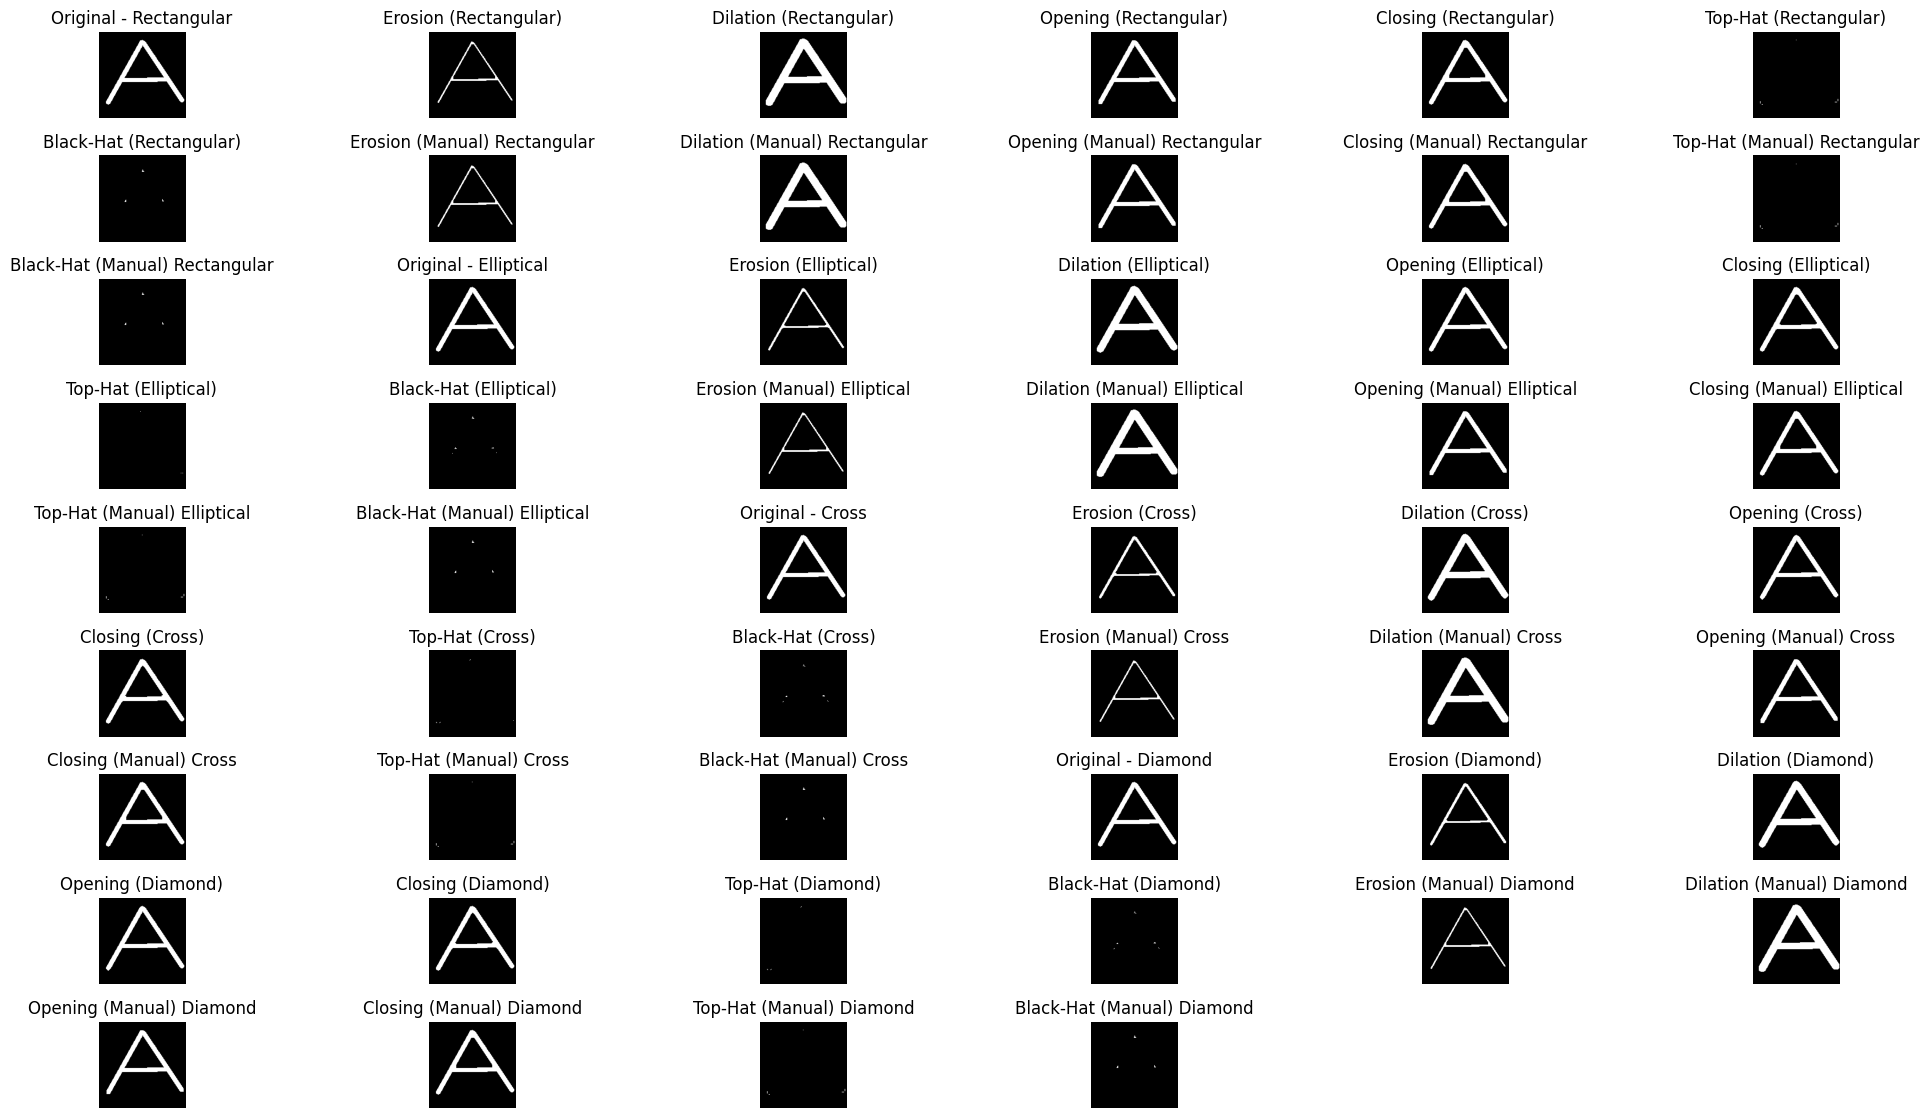

In [99]:
if __name__ == "__main__":
    main()